# 01. Linear Regression — 從數學到 PyTorch

## 0. Notebook Header
- 作者：Paul Yang
- 目的：作為深度學習學習系列的第一章
- 學會什麼：模型、Loss、GD、Numpy、PyTorch

## 1. Linear Regression 是什麼？
- 問題:給$x$， 要預測$y$
- 模型: $$y = wx + b$$

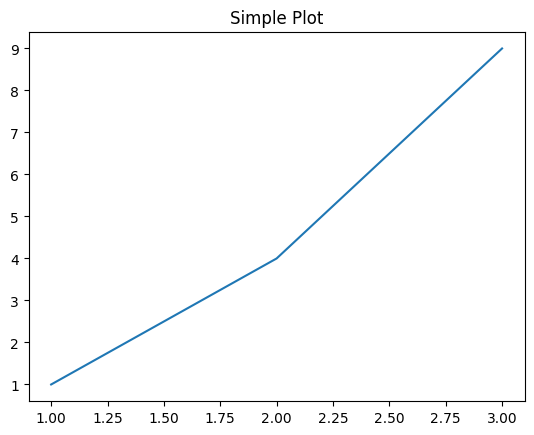

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 9])
ax.set_title("Simple Plot")
plt.show()

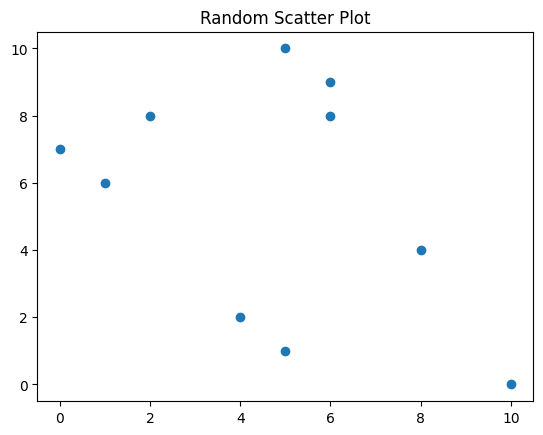

In [4]:
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots()
x = [random.randint(0, 10) for _ in range(10)]
y = [random.randint(0, 10) for _ in range(10)]
ax.scatter(x, y)
ax.set_title("Random Scatter Plot")
plt.show()

In [13]:
output = 0
weight = random.random()
input = 0
bias = random.random()
output = weight * input + bias

In [ ]:
# Input should be a number
def linear_regression(input, weight, bias):
    return weight * input + bias # Output calculation

## 2. MSE Loss（均方誤差）
$$l^{(i)}(w, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2$$
$$L(w, b) = \frac{1}{n} \sum_{i=1}^{n} l^{(i)}(w, b)
        = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2$$


In [ ]:
# Input should be a number
def loss_function(output_True, output_Pred):
    return((output_True - output_Pred) ** 2)/2

In [ ]:
# Input should be lists of numbers
def MSE(targets, outputs):
    total_loss = 0
    for i in range(len(outputs)):
        total_loss += loss_function(outputs[i], targets[i])
    return total_loss / len(outputs)

## 3.手算 Gradient（最重要的理解）
$$w \leftarrow w - \eta \, \nabla_w L(w,b)$$
$$b \leftarrow b - \eta \, \nabla_b L(w,b)$$

在最小化損失函數時，對權重向量 $w$ 進行更新所需的量為梯度（Gradient）。

$$\nabla_{w}\, l^{(i)}(w,b)$$


表示「針對第 $i$ 筆資料的 Loss 所計算出的梯度」。  
它反映了單筆資料對整體參數更新方向的貢獻。

在梯度下降（Gradient Descent）中，我們以下公式更新參數：

$$ w \leftarrow w - \eta \, \nabla_{w} L(w,b) $$

其中，$\eta$（eta）稱為 $\textbf{學習率（Learning Rate）}$，控制每次更新的步伐大小。

整體損失函數的梯度為

$$ \nabla_{w} L(w,b) = \frac{1}{n} \sum_{i=1}^{n} \nabla_{w}\, l^{(i)}(w,b)$$

代表「將所有樣本的梯度平均」後得到的真正用來更新模型參數的梯度。


In [ ]:
gradient = random.random()
learning_rate = 0.01
# Input should be a number
def update_parameter(parameter, gradient, learning_rate):
    return parameter - learning_rate * gradient

### 線性回歸（Linear Regression）MSE Loss 微分推導（完整）

**1. 單筆資料的 Loss 定義**

$$
l^{(i)}(w,b)
= \frac{1}{2}\left( w^\top x^{(i)} + b - y^{(i)} \right)^2
$$

定義預測值：

$$
\hat{y}^{(i)} = w^\top x^{(i)} + b
$$

---
**2. 對 ( w ) 求偏導數（Gradient w.r.t. w）**

Step 1：重寫 Loss

$$
l^{(i)}
= \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2
$$

Step 2：使用鏈式法則

$$
\frac{\partial l^{(i)}}{\partial w}
= (\hat{y}^{(i)} - y^{(i)}) \cdot
\frac{\partial \hat{y}^{(i)}}{\partial w}
$$

Step 3：因為

$$
\hat{y}^{(i)} = w^\top x^{(i)} + b
$$

所以：

$$
\frac{\partial (w^\top x^{(i)})}{\partial w} = x^{(i)}
$$

Step 4：合併得到最終結果

$$
\nabla_w l^{(i)}
= (\hat{y}^{(i)} - y^{(i)}) , x^{(i)}
$$

---

**3. 對 ( b ) 求偏導數（Gradient w.r.t. b）**

因為：

$$
\frac{\partial \hat{y}^{(i)}}{\partial b} = 1
$$

所以：

$$
\nabla_b l^{(i)}
= (\hat{y}^{(i)} - y^{(i)})
$$

---

**4. 整個資料集的 Loss（平均）**

$$
L(w,b)
= \frac{1}{n} \sum_{i=1}^{n}
\frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2
$$

---

**5. 對整個 Loss 求梯度（平均後）**

對 ( w )：

$$
\nabla_w L(w,b)
= \frac{1}{n}\sum_{i=1}^n
(\hat{y}^{(i)} - y^{(i)}) , x^{(i)}
$$

對 ( b )：

$$
\nabla_b L(w,b)
= \frac{1}{n}\sum_{i=1}^n
(\hat{y}^{(i)} - y^{(i)})
$$

---

**6. 梯度下降更新規則（Gradient Descent Update）**

對 ( w )：

$$
w \leftarrow w - \eta , \nabla_w L(w,b)
$$

對 ( b )：

$$
b \leftarrow b - \eta , \nabla_b L(w,b)
$$

In [ ]:
# Input should be lists of numbers
def full_batch(inputs, outputs, targets):
    n = len(outputs)
    gradient_w = 0
    gradient_b = 0
    for i in range(n):
        error = outputs[i] - targets[i]
        gradient_w += error * inputs[i]
        gradient_b += error
    gradient_w /= n
    gradient_b /= n
    return gradient_w, gradient_b

## 4. 用 Python for-loop 實作

In [45]:
# x input list
# y output list(target)
def train_linear_regression(x, y, epochs, learning_rate):
    weight = random.random()
    bias = random.random()
    loss_history = []
    for epoch in range(epochs):
        outputs = [linear_regression(xi, weight, bias) for xi in x]
        loss = MSE(outputs, y)
        loss_history.append(loss)
        gradient_w, gradient_b = full_batch(x, outputs, y)
        weight = update_parameter(weight, gradient_w, learning_rate)
        bias = update_parameter(bias, gradient_b, learning_rate)
        if (epoch + 1) % 100 == 0:
            print(  f"Epoch {epoch+1}/{epochs}, Loss: {loss}, Weight: {weight}, Bias: {bias}" )
    return weight, bias, loss_history

In [ ]:
weight, bias, loss_history = train_linear_regression(x, y, epochs=1000, learning_rate=0.01)

Epoch 100/1000, Loss: 9.230414670450317, Weight: 0.41492296626476916, Bias: 2.0002630200820266
Epoch 200/1000, Loss: 7.325202419648702, Weight: 0.2052927588996658, Bias: 3.3573297352476033
Epoch 300/1000, Loss: 6.2245667489590275, Weight: 0.045960404673084744, Bias: 4.388787163485872
Epoch 400/1000, Loss: 5.5887326684859415, Weight: -0.07514236683335901, Bias: 5.172760725270628
Epoch 500/1000, Loss: 5.2214131379116475, Weight: -0.16718821237259068, Bias: 5.7686307328454856
Epoch 600/1000, Loss: 5.009213695187638, Weight: -0.2371489372646816, Bias: 6.221530018274122
Epoch 700/1000, Loss: 4.886626683759259, Weight: -0.2903235590931122, Bias: 6.56576241818393
Epoch 800/1000, Loss: 4.81580851770739, Weight: -0.3307396698603739, Bias: 6.827401040632892
Epoch 900/1000, Loss: 4.77489706563337, Weight: -0.36145849687567305, Bias: 7.02626311397324
Epoch 1000/1000, Loss: 4.751262636727385, Weight: -0.38480676852481766, Bias: 7.177410998192586


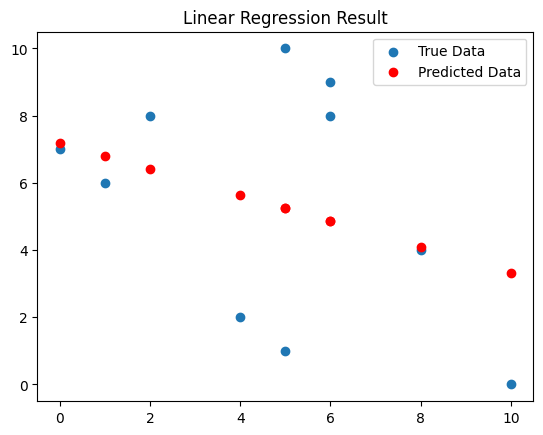

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_pred = [linear_regression(xi, weight, bias) for xi in x]
ax.scatter(x, y, label='True Data')
ax.scatter(x, y_pred, color='red', label='Predicted Data')
ax.set_title("Linear Regression Result")
ax.legend()
plt.show()

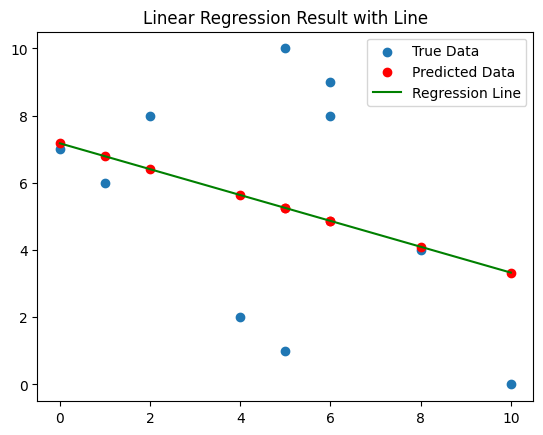

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_pred = [linear_regression(xi, weight, bias) for xi in x]
ax.scatter(x, y, label='True Data')
ax.scatter(x, y_pred, color='red', label='Predicted Data')
x_sorted = sorted(x)
y_pred_sorted = [linear_regression(xi, weight, bias) for xi in x_sorted]
ax.plot(x_sorted, y_pred_sorted, color='green', label='Regression Line')
ax.set_title("Linear Regression Result with Line")
ax.legend()
plt.show()

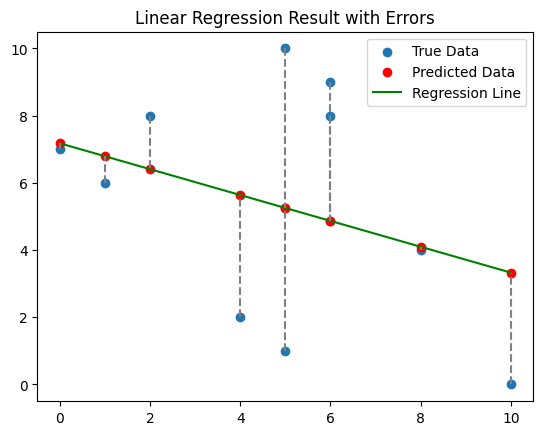

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_pred = [linear_regression(xi, weight, bias) for xi in x]
ax.scatter(x, y, label='True Data')
ax.scatter(x, y_pred, color='red', label='Predicted Data')
x_sorted = sorted(x)
y_pred_sorted = [linear_regression(xi, weight, bias) for xi in x_sorted]
ax.plot(x_sorted, y_pred_sorted, color='green', label='Regression Line')
# plt.plot([x_sorted, x_sorted], [y_pred_sorted, y], color='gray', linestyle='--', label='Errors')
for xi, yi_true, yi_pred in zip(x, y, y_pred):
    ax.plot([xi, xi], [yi_true, yi_pred], color='gray', linestyle='--')
ax.set_title("Linear Regression Result with Errors")
ax.legend()
plt.show()

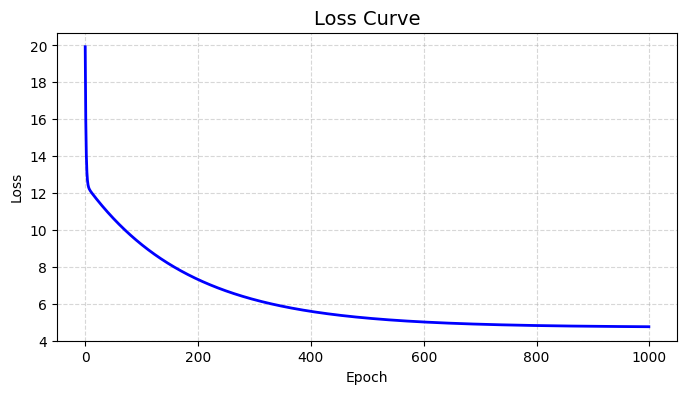

In [61]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(loss_history, color='blue', linewidth=2)

ax.set_title("Loss Curve", fontsize=14)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid(True, linestyle="--", alpha=0.5)
plt.show()

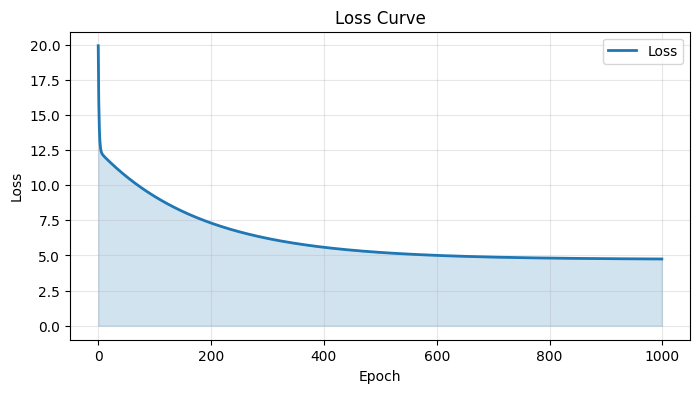

In [62]:
plt.figure(figsize=(8,4))
plt.plot(loss_history, label="Loss", color="#1f77b4", linewidth=2)
plt.fill_between(range(len(loss_history)), loss_history, alpha=0.2, color="#1f77b4")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


![pic](https://matplotlib.org/stable/_images/anatomy.png)

### **Stochastic Gradient Descent（SGD）完整推導**

---

**1. Loss 定義**

$$L(w,b)=\frac{1}{n}\sum_{i=1}^{n}\frac12\left(w^\top x^{(i)}+b-y^{(i)}\right)^2$$

---

**2. 單筆資料的 Loss**

$$l^{(i)}(w,b)=\frac12\left(w^\top x^{(i)}+b-y^{(i)}\right)^2$$

預測值定義：

$$\hat{y}^{(i)} = w^\top x^{(i)} + b$$

---

**3. 單筆資料的梯度（重點）**

對 w：

$$\nabla_w l^{(i)}=(\hat{y}^{(i)}-y^{(i)}),x^{(i)}$$

對 b：

$$\nabla_b l^{(i)}=(\hat{y}^{(i)}-y^{(i)})$$

---

**4. Batch Gradient Descent（使用所有資料）**

更新：

$$w \leftarrow w - \eta ,\nabla_w L(w,b)$$

其中：

$$\nabla_w L(w,b)=\frac{1}{n}\sum_{i=1}^n (\hat{y}^{(i)}-y^{(i)})x^{(i)}$$

---

**5. SGD（真正的隨機梯度下降）**

每次從資料集中 **隨機抽一筆** ( $i \sim {1,\dots,n} $)，更新：

對 w：

$$w \leftarrow w - \eta , (\hat{y}^{(i)}-y^{(i)}) , x^{(i)}$$

對 b：

$$b \leftarrow b - \eta , (\hat{y}^{(i)}-y^{(i)})$$

---

**6. Mini-batch SGD（最常用版本）**

抽一小批資料 (B)，大小例如 32、64、128：

梯度近似：

$$\nabla_w L \approx \frac{1}{|B|}\sum_{i\in B}(\hat{y}^{(i)}-y^{(i)})x^{(i)}$$

更新：

$$w \leftarrow w - \eta \cdot \frac{1}{|B|}\sum_{i\in B}(\hat{y}^{(i)}-y^{(i)})x^{(i)}$$

In [ ]:
# Stochastic Gradient Descent
# input should be a number
def stochastic_gradient(input, output, target):
    gradient_w = 0
    gradient_b = 0
    error = output - target
    gradient_w += error * input
    gradient_b += error
    return gradient_w, gradient_b

def train_linear_regression(x, y, epochs, learning_rate):
    weight = random.random()
    bias = random.random()
    loss_history = []
    for epoch in range(epochs):
        random_index = random.randint(0, len(x) - 1)
        output = linear_regression(x[random_index], weight, bias)
        loss = MSE([output], [y[random_index]])
        loss_history.append(loss)
        gradient_w, gradient_b = stochastic_gradient(x[random_index], output, y[random_index])
        weight = update_parameter(weight, gradient_w, learning_rate)
        bias = update_parameter(bias, gradient_b, learning_rate)
        if (epoch + 1) % 100 == 0:
            print(  f"Epoch {epoch+1}/{epochs}, Loss: {loss}, Weight: {weight}, Bias: {bias}" )
    return weight, bias, loss_history

weight, bias, loss_history = train_linear_regression(x, y, epochs=1000, learning_rate=0.01)

Epoch 100/1000, Loss: 6.372702659054989, Weight: 0.5204450134373011, Bias: 1.980885629862523
Epoch 200/1000, Loss: 3.119190808081727, Weight: 0.6475450078439259, Bias: 3.5411945502666247
Epoch 300/1000, Loss: 3.0655986961078163, Weight: 0.03853855759775138, Bias: 4.548635774897875
Epoch 400/1000, Loss: 5.527911602612212, Weight: -0.28610252322580954, Bias: 5.125059753999314
Epoch 500/1000, Loss: 32.55778343687115, Weight: -0.5787362209482404, Bias: 5.7066679922957055
Epoch 600/1000, Loss: 0.0029413193268254777, Weight: -0.2799965835904728, Bias: 6.204832189340493
Epoch 700/1000, Loss: 2.3049387583293584, Weight: -0.23001677617084082, Bias: 6.591606095594477
Epoch 800/1000, Loss: 0.2122619142615862, Weight: -0.35732193993578537, Bias: 6.995845772626199
Epoch 900/1000, Loss: 0.06829069345308461, Weight: -0.617491072928141, Bias: 6.979668880068066
Epoch 1000/1000, Loss: 2.6055132435766866, Weight: -0.8993105589359883, Bias: 7.185800587150066


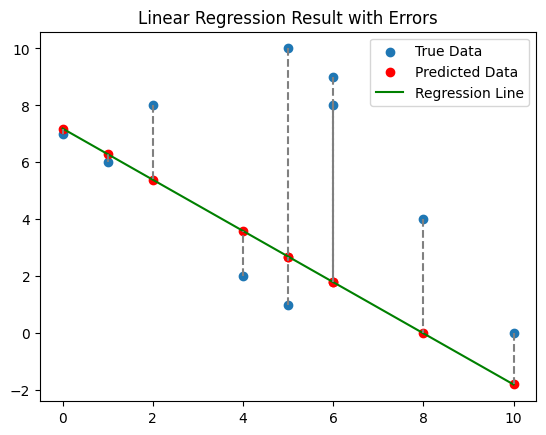

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_pred = [linear_regression(xi, weight, bias) for xi in x]
ax.scatter(x, y, label='True Data')
ax.scatter(x, y_pred, color='red', label='Predicted Data')
x_sorted = sorted(x)
y_pred_sorted = [linear_regression(xi, weight, bias) for xi in x_sorted]
ax.plot(x_sorted, y_pred_sorted, color='green', label='Regression Line')
# plt.plot([x_sorted, x_sorted], [y_pred_sorted, y], color='gray', linestyle='--', label='Errors')
for xi, yi_true, yi_pred in zip(x, y, y_pred):
    ax.plot([xi, xi], [yi_true, yi_pred], color='gray', linestyle='--')
ax.set_title("Linear Regression Result with Errors")
ax.legend()
plt.show()

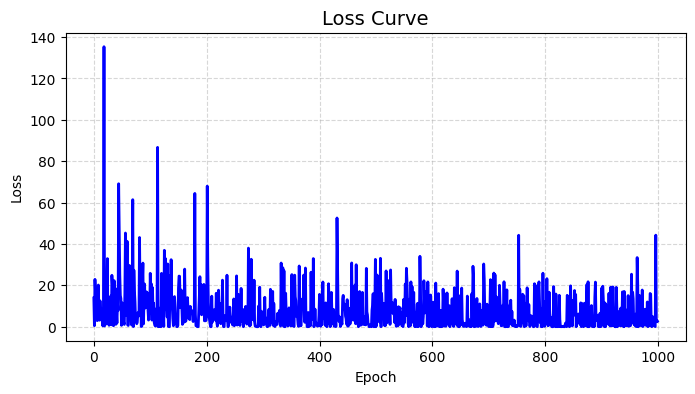

In [66]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(loss_history, color='blue', linewidth=2)

ax.set_title("Loss Curve", fontsize=14)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [72]:
test_x = [1,2,3,4,5]
test_y = [1,2,3,4,5]
data = list(zip(test_x, test_y))
random.shuffle(data)
print(data)
shuffled_x, shuffled_y = zip(*data)
shuffled_x = list(shuffled_x)
shuffled_y = list(shuffled_y)
print(shuffled_x)
print(shuffled_y)

[(2, 2), (1, 1), (3, 3), (4, 4), (5, 5)]
[2, 1, 3, 4, 5]
[2, 1, 3, 4, 5]


## Minibatch Gradient Descent

In [82]:
# Minibatch Gradient Descent
def mini_batch_gradient(input, output, target):
    error = output - target
    gradient_w = error * input
    gradient_b = error
    return gradient_w, gradient_b

def train_linear_regression(x, y, epochs, learning_rate, batch_size=5):
    weight = random.random()
    bias = random.random()
    loss_history = []
    for epoch in range(epochs):
        data = list(zip(x, y))
        random.shuffle(data)
        shuffled_x, shuffled_y = zip(*data)
        shuffled_x = list(shuffled_x)
        shuffled_y = list(shuffled_y)
        i = 0
        while i + batch_size < len(shuffled_x):
            batch_gradient_w = 0
            batch_gradient_b = 0
            batch_x = shuffled_x[i:i + batch_size]
            batch_y = shuffled_y[i:i + batch_size]
            batch_outputs = [linear_regression(xi, weight, bias) for xi in batch_x]
            loss = MSE(batch_outputs, batch_y)
            for j in range(len(batch_x)):
                gradient_w, gradient_b = mini_batch_gradient(batch_x[j], batch_outputs[j], batch_y[j])
                batch_gradient_w += gradient_w
                batch_gradient_b += gradient_b
            i += batch_size
            weight = update_parameter(weight, batch_gradient_w / batch_size, learning_rate)
            bias = update_parameter(bias, batch_gradient_b / batch_size, learning_rate)
        if (epoch + 1) % 100 == 0:
            print(  f"Epoch {epoch+1}/{epochs}, Loss: {loss}, Weight: {weight}, Bias: {bias}" )
            loss_history.append(loss)
    return weight, bias, loss_history

weight, bias, loss_history = train_linear_regression(x, y, epochs=1000, learning_rate=0.01)

Epoch 100/1000, Loss: 7.117915410514859, Weight: 0.22756497733116662, Bias: 2.4578387954395695
Epoch 200/1000, Loss: 8.03294414181982, Weight: 0.3100983446625625, Bias: 3.6620422757019155
Epoch 300/1000, Loss: 6.5679664497299415, Weight: 0.01701809661754615, Bias: 4.555880748945354
Epoch 400/1000, Loss: 4.434469663245883, Weight: -0.0010999053838571596, Bias: 5.312048087573113
Epoch 500/1000, Loss: 7.554350799958579, Weight: -0.1353521370674453, Bias: 5.89204283244494
Epoch 600/1000, Loss: 4.043826158198264, Weight: -0.38887428808268754, Bias: 6.319987280172328
Epoch 700/1000, Loss: 5.075282934963364, Weight: -0.14475508695399356, Bias: 6.694128602894374
Epoch 800/1000, Loss: 7.984649914856914, Weight: -0.3619063607909591, Bias: 6.950493203496428
Epoch 900/1000, Loss: 3.1211235713190044, Weight: -0.24857807126763867, Bias: 7.133367104569078
Epoch 1000/1000, Loss: 4.123588229426644, Weight: -0.3889190435888832, Bias: 7.297861988406575


In [85]:
def train_linear_regression(x, y, epochs, learning_rate, batch_size=5):
    weight = random.random()
    bias = random.random()
    loss_history = []
    n_samples = len(x)

    for epoch in range(epochs):
        data = list(zip(x, y))
        random.shuffle(data)
        shuffled_x, shuffled_y = zip(*data)
        
        # 用來累積這一個 Epoch 所有樣本的 Loss
        epoch_total_loss = 0 
        
        # 修正點 1: 使用 range(start, stop, step) 
        # 這樣寫 Python 會自動處理最後不足 batch_size 的情況 (例如取 [95:100] 或是 [98:100])
        for i in range(0, n_samples, batch_size):
            batch_x = shuffled_x[i : i + batch_size]
            batch_y = shuffled_y[i : i + batch_size]
            
            # 計算目前的預測值
            batch_outputs = [linear_regression(xi, weight, bias) for xi in batch_x]
            
            # 計算這個 Batch 的 Loss (為了更新參數)
            # 注意：這裡假設你的 MSE 函式回傳的是平均誤差
            current_batch_loss = MSE(batch_outputs, batch_y)
            
            # 修正點 2: 累積 Loss (乘以數量還原成總誤差，最後再除以總數)
            # 或是更簡單：直接把每個 batch 的 loss 加起來取平均 (近似值)
            # 這裡示範最精準的做法：累積「總誤差平方和」
            epoch_total_loss += current_batch_loss * len(batch_x)

            # --- Gradient 計算區塊 (保持你不變的邏輯) ---
            batch_gradient_w = 0
            batch_gradient_b = 0
            for j in range(len(batch_x)):
                gradient_w, gradient_b = mini_batch_gradient(batch_x[j], batch_outputs[j], batch_y[j])
                batch_gradient_w += gradient_w
                batch_gradient_b += gradient_b
            
            # 更新參數 (記得除以該次實際的 batch 大小，因為最後一次可能小於 batch_size)
            current_batch_size = len(batch_x) 
            weight = update_parameter(weight, batch_gradient_w / current_batch_size, learning_rate)
            bias = update_parameter(bias, batch_gradient_b / current_batch_size, learning_rate)
            # ---------------------------------------

        # 修正點 3: 計算並紀錄 "Epoch Average Loss"
        epoch_avg_loss = epoch_total_loss / n_samples
        
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_avg_loss:.4f}, Weight: {weight:.2f}, Bias: {bias:.2f}")
            loss_history.append(epoch_avg_loss)

    return weight, bias, loss_history

weight, bias, loss_history = train_linear_regression(x, y, epochs=1000, learning_rate=0.01)

Epoch 100/1000, Loss: 7.5820, Weight: 0.12, Bias: 3.60
Epoch 200/1000, Loss: 5.7083, Weight: -0.07, Bias: 5.35
Epoch 300/1000, Loss: 5.0169, Weight: -0.26, Bias: 6.34
Epoch 400/1000, Loss: 5.2667, Weight: -0.35, Bias: 6.92
Epoch 500/1000, Loss: 5.0006, Weight: -0.42, Bias: 7.24
Epoch 600/1000, Loss: 4.8333, Weight: -0.44, Bias: 7.43
Epoch 700/1000, Loss: 4.9416, Weight: -0.45, Bias: 7.53
Epoch 800/1000, Loss: 4.7238, Weight: -0.45, Bias: 7.60
Epoch 900/1000, Loss: 4.7561, Weight: -0.45, Bias: 7.64
Epoch 1000/1000, Loss: 4.7237, Weight: -0.46, Bias: 7.66


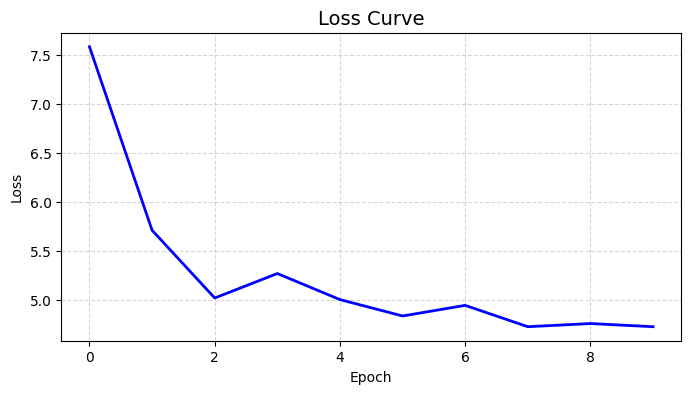

In [88]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(loss_history, color='blue', linewidth=2)

ax.set_title("Loss Curve", fontsize=14)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Numpy 實作

In [90]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X Shape: (100, 1)
Y Shape: (100, 1)


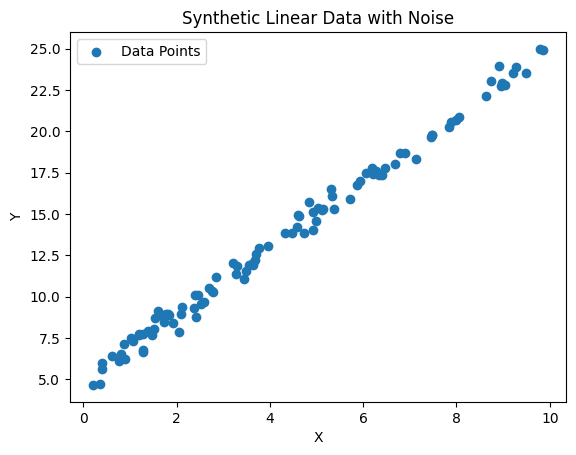

In [94]:
N = 100
X = np.random.rand(N, 1) * 10

true_w = 2
true_b = 5
noise = np.random.randn(N, 1) * 0.5

Y = true_w * X + true_b + noise

print(f"X Shape: {X.shape}")
print(f"Y Shape: {Y.shape}")

fig, ax = plt.subplots()
ax.scatter(X, Y, label='Data Points')
ax.set_title("Synthetic Linear Data with Noise")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.legend()
plt.show()

In [96]:
# 承接上一段生成的 X 和 y_true

# 1. 初始化參數 (Initialize Parameters)
# w 的形狀我們設定為 (1, 1)，代表 1 個輸入特徵對應 1 個輸出
# b 初始化為 0
w = np.random.randn(1, 1)
b = np.zeros(1)

print(f"Initial w: {w}")
print(f"Initial b: {b}")

# 2. Forward Pass (預測)
# 傳統寫法: for i in range(N): y[i] = w * x[i] + b
# NumPy 寫法: 矩陣乘法 (Matrix Multiplication) 或 廣播 (Broadcasting)
def np_forward(X, w, b):
    # X: (100, 1), w: (1, 1)
    # X.dot(w) 或 X @ w 會得到 (100, 1) 的矩陣
    # + b 會自動把 b 複製 100 次加到每一行 (這就是 Broadcasting!)
    return X.dot(w) + b

# 3. MSE Loss
# NumPy 寫法: 直接對整個矩陣做減法和平方，再取平均
def np_mse(y_pred, y_true):
    # 這裡會回傳一個純量 (Scalar)
    return np.mean(0.5 * (y_pred - y_true)**2)

# 4. 計算梯度 (Gradient) - 最神奇的地方
# 數學公式: dL/dw = (1/N) * sum( (y_pred - y) * x )
def np_grad(X, y_true, y_pred):
    N = len(X)
    error = y_pred - y_true  # 形狀 (100, 1)
    
    # 對 w 的梯度: X轉置後 (1, 100) 乘上 error (100, 1) -> 得到 (1, 1)
    # 這一步等同於把所有樣本的 error * x 加總起來！
    dw = (1/N) * X.T.dot(error) 
    
    # 對 b 的梯度: error 的平均值
    db = np.mean(error)
    
    return dw, db

# --- 測試一下 ---
y_pred = np_forward(X, w, b)
loss = np_mse(y_pred, Y)
dw, db = np_grad(X, Y, y_pred)

print(f"Prediction Shape: {y_pred.shape}") # 應該要是 (100, 1)
print(f"Loss: {loss:.4f}")
print(f"Gradient w (dw): {dw}")
print(f"Gradient b (db): {db}")

Initial w: [[-1.2446547]]
Initial b: [0.]
Prediction Shape: (100, 1)
Loss: 217.3354
Gradient w (dw): [[-104.95011559]]
Gradient b (db): -18.88263866266542
